<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gallery" data-toc-modified-id="Gallery-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gallery</a></span><ul class="toc-item"><li><span><a href="#Line-&amp;-area-chart" data-toc-modified-id="Line-&amp;-area-chart-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Line &amp; area chart</a></span></li><li><span><a href="#line-plot" data-toc-modified-id="line-plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>line plot</a></span></li><li><span><a href="#double-y-line-plot" data-toc-modified-id="double-y-line-plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>double-y line plot</a></span></li><li><span><a href="#bar-plot" data-toc-modified-id="bar-plot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>bar plot</a></span></li></ul></li><li><span><a href="#Useful-code-snippt" data-toc-modified-id="Useful-code-snippt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful code snippt</a></span><ul class="toc-item"><li><span><a href="#library" data-toc-modified-id="library-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>library</a></span></li><li><span><a href="#io" data-toc-modified-id="io-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>io</a></span></li><li><span><a href="#save" data-toc-modified-id="save-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>save</a></span></li></ul></li><li><span><a href="#TODO" data-toc-modified-id="TODO-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TODO</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

# v4r-plot Python

> created on 2021-05-12
> 
> last updated on 2021-05-13

## Gallery

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# need xlrd for Excel support
# set seaborn style
sns.set_theme()

In [2]:
example_folder = './example/'

### X-Y trajectory

- read from two different data

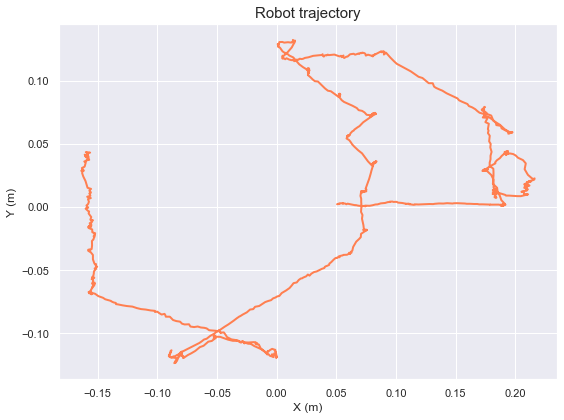

In [3]:
# data
robot_x = pd.read_csv('./data/x_data.csv', header=None, names=['X'])
robot_y = pd.read_csv('./data/y_data.csv', header=None, names=['Y'])

# discard first row
robot_x = robot_x[1:]
robot_y = robot_y[1:]

# axes instance
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(robot_x['X'].values, robot_y['Y'].values, color="coral", linewidth=2)

# title and label
ax.set_title("Robot trajectory", fontsize=15)
_ = ax.set_xlabel("X (m)")
_ = ax.set_ylabel("Y (m)")

# save
fig.tight_layout()
plt.savefig(example_folder+"robot_trajectory.png", dpi=300) # png, pdf

### Line & area chart

- with transpraent filling
- read from dataframe

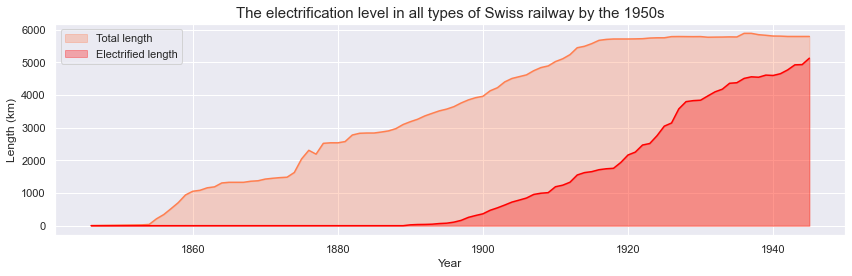

In [4]:
# data
swiss_rail_df = pd.read_excel('./data/swiss_railway.xls', header=0)

# axes instance
fig, ax = plt.subplots(figsize=(12, 4))
#fig = plt.figure(figsize=(12, 4))
#ax = fig.add_subplot(1,1,1)


line1 = ax.fill_between(swiss_rail_df['Year'].values, swiss_rail_df['Total-L'].values, color="coral", alpha=0.3)
ax.plot(swiss_rail_df['Year'].values, swiss_rail_df['Total-L'].values, color="coral")
line2 = ax.fill_between(swiss_rail_df['Year'].values, swiss_rail_df['Total-E'].values, color="red", alpha=0.3)
ax.plot(swiss_rail_df['Year'].values, swiss_rail_df['Total-E'].values, color="red")
ax.legend([line1, line2], ['Total length', 'Electrified length'])

# title and label
ax.set_title("The electrification level in all types of Swiss railway by the 1950s", fontsize=15)
ax.set_xlabel("Year")
ax.set_ylabel("Length (km)")

# save
fig.tight_layout()
plt.savefig(example_folder+"all_rail_length.png", dpi=300) # png, pdf

### line plot

- read from dataframe
- with annotation
- with different marker setting

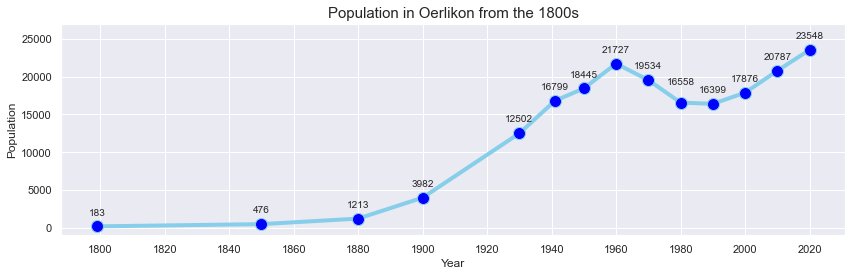

In [5]:
# data
year = [1799, 1850, 1880, 1900, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
popu = [183, 476, 1213, 3982, 12502, 16799, 18445, 21727, 19534, 16558, 16399, 17876, 20787, 23548]
df=pd.DataFrame({'Year': year, 
                 'Population': popu})

# axes instance
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot( 'Year', 'Population', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

# xtick
# can add `rotation=90` to rotate ticklabel
plt.xticks([r*20 + 1800 for r in range(12)], range(1800, 2030, 20))

# text
for i, txt in enumerate(popu):
    if i < 5:
        ax.annotate(txt, (year[i], popu[i]+1500), fontsize=10,
            horizontalalignment='center')
    elif i == 9:
        ax.annotate(txt, (year[i], popu[i]+2400), fontsize=10,
            horizontalalignment='center')
    else:
        ax.annotate(txt, (year[i], popu[i]+1500), fontsize=10,
            horizontalalignment='center')

# title and label
ax.set_title("Population in Oerlikon from the 1800s", fontsize=15)
ax.set_xlabel("Year")
ax.set_ylabel("Population")

# xlim
ax.set_ylim([-1000,27000])

# save
fig.tight_layout()
plt.savefig(example_folder+"oerlikon_population.png", dpi=300) # png, pdf

### double-y line plot

- read from dataframe
- with annotation

/home/he/miniconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


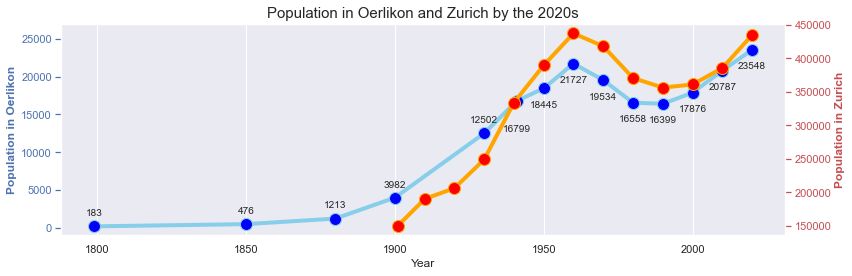

In [6]:
# data
year = [1799, 1850, 1880, 1900, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
popu = [183, 476, 1213, 3982, 12502, 16799, 18445, 21727, 19534, 16558, 16399, 17876, 20787, 23548]
df=pd.DataFrame({'Year': year, 'Population': popu})
zurich_df = pd.read_excel('./data/zurich_population_data.xls')

## first axes instance
fig, ax = plt.subplots(figsize=(12, 4))

# plot
ax.plot( 'Year', 'Population', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

# xtick
ax.set_xticks([r*20 + 1800 for r in range(12)], range(1800, 2030, 20))

# text
for i, txt in enumerate(popu):
    if i < 5:
        ax.annotate(txt, (year[i], popu[i]+1400), fontsize=10,
            horizontalalignment='center')
    elif i == 5:
        ax.annotate(txt, (year[i], popu[i]-4000), fontsize=10,
            horizontalalignment='center')
    else:
        ax.annotate(txt, (year[i], popu[i]-2500), fontsize=10,
            horizontalalignment='center')

# title and label
ax.set_title("Population in Oerlikon and Zurich by the 2020s", fontsize=15)
ax.set_xlabel("Year")
ax.set_ylabel("Population in Oerlikon", color='b', fontdict=dict(weight='bold'))
ax.tick_params('y', colors='b')

# xlim
ax.set_ylim([-1000,27000])
ax.grid(axis='y')

## second axes instance
ax2 = ax.twinx()
year_zh = zurich_df['Jahr'].values
pp_zh = zurich_df['Total'].values
ax2.set_ylabel('Population in Zurich', color='r', fontdict=dict(weight='bold'))
ax2.tick_params('y', colors='r')
ax2.plot(year_zh, pp_zh, marker='o', markerfacecolor='red', markersize=12, color='orange', linewidth=4)
ax2.grid()

# save
fig.tight_layout()
plt.savefig(example_folder+"oerlikon_zurich_population.png", dpi=300) # png, pdf

### bar plot

- group with multiple bar
- with annotation
    `ax.bar_label(rects1, padding=3)` could be used for convenient annotation

/home/he/miniconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


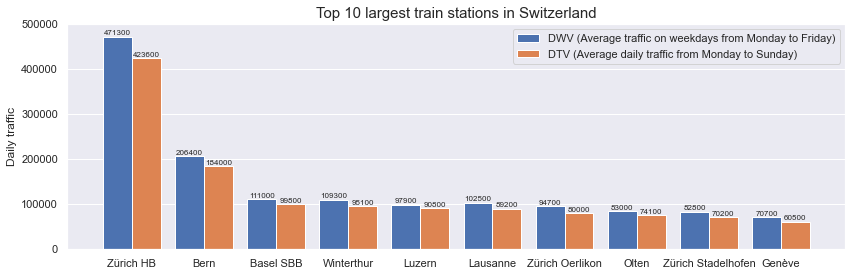

In [7]:
# data
sta_feq_df = pd.read_excel('./data/station_freq.xls')

station = sta_feq_df['Bahnhof_Haltestelle'].values
dtv = sta_feq_df['DTV'].values
dwv = sta_feq_df['DWV'].values

x = np.arange(len(station))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 4))
rects1 = ax.bar(x - width/2, dwv, width, label='DWV (Average traffic on weekdays from Monday to Friday)')
rects2 = ax.bar(x + width/2, dtv, width, label='DTV (Average daily traffic from Monday to Sunday)')

# title and label
ax.set_title("Top 10 largest train stations in Switzerland", fontsize=15)
ax.set_ylabel('Daily traffic')
ax.set_xticks(x)
ax.set_xticklabels(station, Fontsize=11)
ax.legend()

# in newer version
# ax.bar_label(rects1, padding=3)
for i, txt in enumerate(dwv):
    ax.annotate(dwv[i], (i - width/2, dwv[i]+4000), fontsize=8,
            horizontalalignment='center')
    ax.annotate(dtv[i], (i + width/2, dtv[i]+4000), fontsize=8,
            horizontalalignment='center')

# xlim
ax.set_ylim([-1000,500000])

# grid
ax.grid(axis='x')

# save
fig.tight_layout()
plt.savefig(example_folder+"oerlikon_station_traffic.png", dpi=300) # png, pdf

## Useful code snippt

### library

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# need xlrd for Excel support
# set seaborn style
sns.set_theme()
```

### io

- read from excel into dataframe
    - [Plot data from excel file in matplotlib Python](https://www.codespeedy.com/plot-data-from-excel-file-in-matplotlib-python/)
    - [最新Pandas.read_excel()全参数详解（案例实操，如何利用python导入excel）](https://zhuanlan.zhihu.com/p/142972462)

In [8]:
test_df = pd.read_excel('./data/swiss_railway.xls', header=0)
test_df.head()

,Year,Normal-C,Narrow-C,Gear-C,Cable-C,Tram-C,Total-C,Normal-L,Narrow-L,Gear-L,...,Total-L,Normal-E,PNormal-E,Narrow-E,PNarrow-E,Gear-E,Cable-E,Tram-E,Total-E,PTotal-E
0,1846,1,0,0,0,0,1,1.9,0.0,0.0,...,1.9,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,1853,2,0,0,0,0,2,25.2,0.0,0.0,...,25.2,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2,1854,3,0,0,0,0,3,38.5,0.0,0.0,...,38.5,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
3,1855,6,0,0,0,0,6,210.3,0.0,0.0,...,210.3,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
4,1856,7,0,0,0,0,7,339.8,0.0,0.0,...,339.8,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


### save

- save with high dpi and tight layout
    - [matplotlib.pyplot.savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

- **personal tip**: if installed with TeXLive, there existing `pdfcrop` command line tool to eliminate all all unnecessary space. The command line output is as:
    ```
    >pdfcrop all_rail_length.pdf
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `all_rail_length-crop.pdf'.
    ```
    
    you could compare bwtween `all_rail_length.pdf` and `all_rail_length.pdf` in `example/` folder
    
    <img src="./example/comp.png" alt="comp" style="zoom:20%;" />

```python
fig.tight_layout()
plt.savefig("all.pdf", dpi=300)
```

## TODO

- add more plots
- add some custom function such as save plot

## Reference

### Stackoverflow

- [Dataframe has no column names. How to add a header?](https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe)
- [Disable the output of matplotlib pyplot](https://stackoverflow.com/questions/12056115/disable-the-output-of-matplotlib-pyplot)